# Image Handling
The introduction of cell phones has made digital images a ubiqioutous object in everyone's life. Though some may long for the days of developed film, there are many benefits to switching to digital image processing. The goal of this notebook is to familiarize you with a hallmark of digital images: separating image color into separate digital channels.

Reliance on different colors to convey information is a standard practice in science. By understanding how colors are stored in an image and how we can manipulate the visualization of those colors, we will be able to simulate different spectroscopic practices and eventually combine these with a home-built Raspberry Pi instrument.

In [1]:
# Imports and settings to make the rest of the notebook work. Don't worry about changing these.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

from skimage.color import rgb2gray
from imageProc import *

Let's consider a familiar photo: the Astro's Logo!

![Go 'stros!](astros_logo.png)

The Astro's logo is built on the colors orange, blue, and white. However, that is not how our computers store that information. 

Two different color mapping strategies exist for rendering colors: RGB (red, green, blue) and CMYK (Cyan, Magenta, Yellow, and Black). 

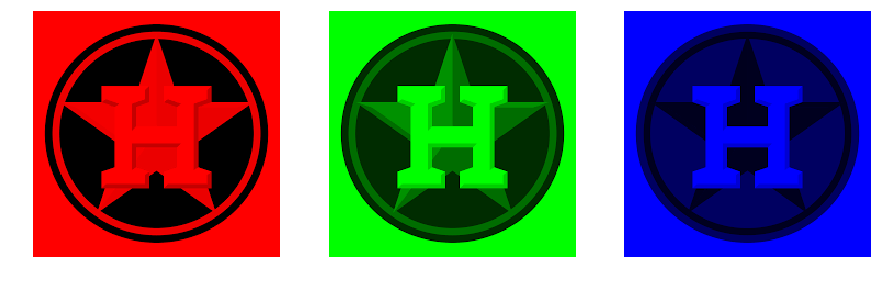

In [2]:
# This uses the matplotlib package to load in the Astros Logo as seen above.
im = plt.imread("astros_logo.png")

# Generate a figure and axes to graph the different versions of the Astro's Logo
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Iterate through all three color channels: Red, Green, and Blue
for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    tmp_im[:,:,c] = im[:,:,c] * 255 # Rescaled for .png's
    ax.imshow(tmp_im)
    ax.set_axis_off()

Equivalently, we can separate the logo into the Cyan, Magenta, and Yellow channels

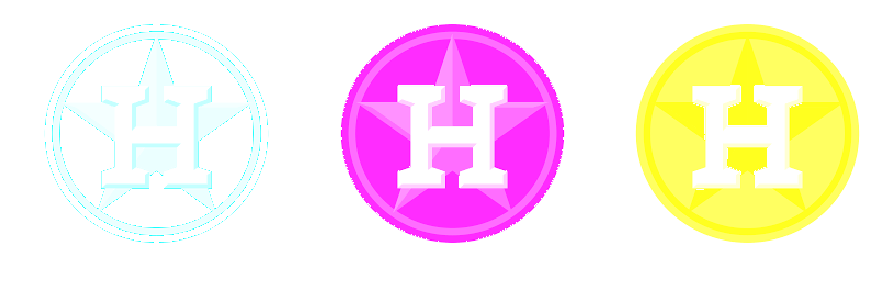

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    tmp_im[:,:,c] = im[:,:,c] * 255
    #Uncommenting reproduces CMY image channels
    tmp_im[tmp_im == 0] = 255
    ax.imshow(tmp_im)
    ax.set_axis_off()

Breaking pictures down into their subsequent color levels can help highlight details that are otherwise lost in the agglomeration of all colors. Our goal in science is often to isolate that desired bit of information (the "signal") from the rest of the photo (the "noise")

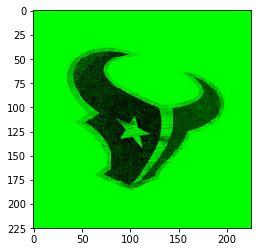

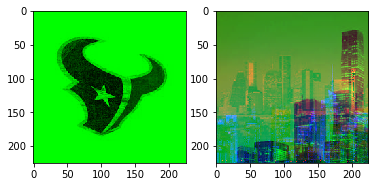

In [27]:
# Taking three images and blend them in the color channels
im1 = io.imread('./texans_logo.jpeg')
im2 = io.imread('./astros_logo.png')
im3 = io.imread('./houston_skyline.jpeg')


# Simple agglomerated image that people can see and deconvolve manually.
agglomerate_im = np.zeros(im1.shape)
indices = np.where(im3 == [255])
new_indices = zip(indices[0],indices[1],indices[2])
for i in new_indices:
    im3[i] = 0
agglomerate_im[:,:,1] = rgb2gray(im1)
#agglomerate_im[:,:,2] = rgb2gray(im2)
#agglomerate_im[:,:,2] = rgb2gray(im3)
plt.imshow(agglomerate_im)

im4 = io.imread('./chicago_skyline.jpg')[0:225, 0:225, :]
im5 = io.imread('./ny_skyline.jpg')[0:225, 0:225, :]

ag_im = np.zeros(im1.shape)
ag_im[:,:,0] = rgb2gray(im3)
ag_im[:,:,1] = rgb2gray(im4)
ag_im[:,:,2] = rgb2gray(im5)

fig, ax = plt.subplots(1,2)
ax[0].imshow(agglomerate_im)
ax[1].imshow(ag_im)

io.imsave('./mixed_city_im.jpg', ag_im)

In [5]:
wavelengths = np.array([400, 430, 480, 520, 560, 600, 640])
print(wavelengths)
print("---------")

np_rgb = nm2rgb(wavelengths)
np_nm = rgb2nm(np_rgb)

print(np_rgb)
print(np_nm)
print("---------")

np_wsl = rgb2wsl(np_rgb[0,:])
print(np_wsl)

[400 430 480 520 560 600 640]
---------
[[  0.   0.   0.]
 [  0.   0. 255.]
 [  0.   0. 255.]
 [  0. 255.   0.]
 [  0. 255.   0.]
 [255.   0.   0.]
 [255.   0.   0.]]
[  0. 440. 440. 510. 510. 645. 645.]
---------
[0. 0. 0.]
[0.0, 0.0, array([0.])]


imageProc.py:123: RuntimeWarning: invalid value encountered in divide
  l = rgb2nm( (rgb - w)/s * INT_MAX)
/home/ldcbishop/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


IndexError: index 6 is out of bounds for axis 0 with size 6